# KerasHub quickstart

We recommend running this example in Colab's GPU runtime. It will run on Jax, TensorFlow or PyTorch, simply change the line below.

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "jax"  # Or "torch" or "tensorflow"

In [ ]:
import keras
import keras_hub

## Ask questions with an instruction tuned Gemma checkpoint

In [ ]:
causal_lm = keras_hub.models.CausalLM.from_preset(
    "gemma2_instruct_2b_en",
    dtype="float16",
)
causal_lm.summary()

Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                              │                      Vocab size: 256,000 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2304)        │   2,614,341,888 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     589,824,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,614,341,888 (4.87 GB)

 Trainable params: 2,614,341,888 (4.87 GB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
prompt = """<start_of_turn>user
Write a short python program to print the first 100 primes.
<end_of_turn>
<start_of_turn>model
"""
text_output = causal_lm.generate(prompt, max_length=512)

In [ ]:
print(text_output)

<start_of_turn>user
Write a short python program to print the first 100 primes.
<end_of_turn>
<start_of_turn>model
```python
def is_prime(num):
  """Checks if a number is prime."""
  if num <= 1:
    return False
  for i in range(2, int(num**0.5) + 1):
    if num % i == 0:
      return False
  return True

count = 0
num = 2
primes = []

while count < 100:
  if is_prime(num):
    primes.append(num)
    count += 1
  num += 1

print("The first 100 prime numbers are:", primes)
```

**Explanation:**

1. **`is_prime(num)` function:**
   - Takes an integer `num` as input.
   - Returns `False` if `num` is less than or equal to 1 (not prime).
   - Iterates from 2 to the square root of `num`. If `num` is divisible by any number in this range, it's not prime, so it returns `False`.
   - If the loop completes without finding a divisor, `num` is prime, and it returns `True`.

2. **Main loop:**
   - Initializes `count` to 0 (to keep track of how many primes we've found).
   - Initializes `num` to 2 

In [ ]:
del causal_lm  # Free memory.

## Generate images with Stable Diffusion 3

In [ ]:
text_to_image = keras_hub.models.TextToImage.from_preset(
    "stable_diffusion_3_medium",
    dtype="float16",
)

100%|██████████| 3.07k/3.07k [00:00<00:00, 2.45MB/s]


100%|██████████| 5.57G/5.57G [04:57<00:00, 20.1MB/s]


100%|██████████| 4.08k/4.08k [00:00<00:00, 3.50MB/s]


100%|██████████| 976k/976k [00:01<00:00, 863kB/s]


100%|██████████| 512k/512k [00:00<00:00, 571kB/s]


100%|██████████| 976k/976k [00:01<00:00, 872kB/s]


100%|██████████| 512k/512k [00:00<00:00, 576kB/s]


In [ ]:
prompt = "Astronaut in a jungle, detailed"
image_output = text_to_image.generate(prompt)

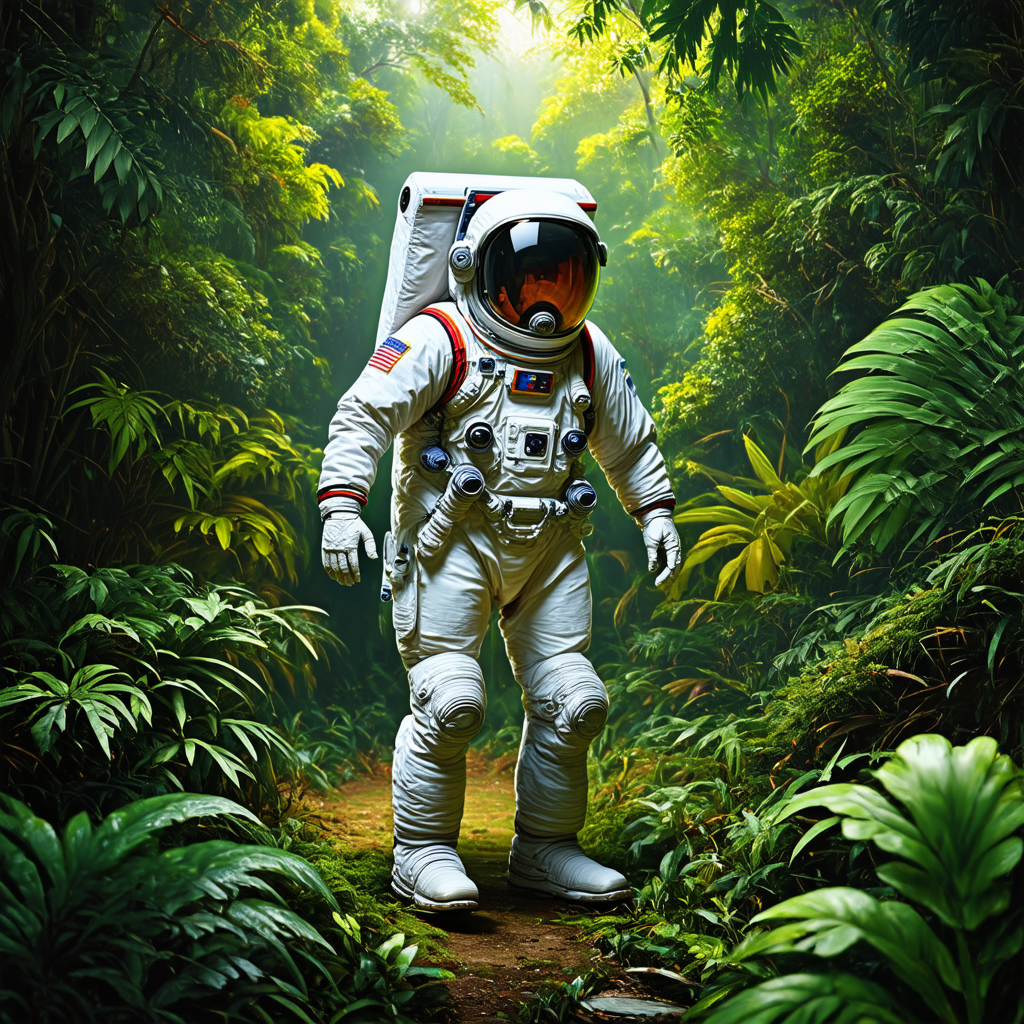

In [ ]:
from PIL import Image

Image.fromarray(image_output)